# SABR Model Test Code

In [1]:
import imp
import numpy as np
import matplotlib.pyplot as plt
import option_models as opt

In [2]:
### only run this when you changed the class definition
CODE_CHANGED = False
if( CODE_CHANGED ):
    imp.reload(opt)

## 1. Pricing using Hagan's formula (provided)

### (1) SABR for $0<\beta\le 1$

In [3]:
# Parameters
strike = np.linspace(75,125,num=25)
# strike = 110 # should work for scalar value 
forward = 100
sigma = 0.2
texp = 1
alpha = 0.3
rho = -0.25
beta = 1

In [4]:
# Create model
sabr_bsm = opt.sabr.ModelHagan(texp, sigma, alpha=alpha, rho=rho, beta=beta)
sabr_bsm.__dict__

{'alpha': 0.3,
 'beta': 1,
 'bsm_model': <option_models.bsm.Model at 0x8900a58>,
 'divr': 0,
 'intr': 0,
 'rho': -0.25,
 'sigma': 0.2,
 'texp': 1}

In [5]:
# This is how you price. you can get either price or bsm_vol
price = sabr_bsm.price(strike, forward)
bsm_vol = sabr_bsm.bsm_vol(strike, forward)

price, bsm_vol

(array([ 25.7950214 ,  23.93821095,  22.13045742,  20.37822632,
         18.68790991,  17.0656334 ,  15.51705804,  14.0471926 ,
         12.66022488,  11.35938377,  10.14684021,   9.02365224,
          7.98975638,   7.04400391,   6.18423763,   5.40740218,
          4.70967939,   4.08663929,   3.53339755,   3.04477074,
          2.61542253,   2.23999514,   1.91322244,   1.63002287,   1.38557147]),
 array([ 0.21618947,  0.21436702,  0.21264884,  0.21103205,  0.20951392,
         0.20809178,  0.20676303,  0.20552513,  0.20437553,  0.20331171,
         0.20233111,  0.20143119,  0.20060937,  0.19986306,  0.19918963,
         0.19858645,  0.19805085,  0.19758017,  0.19717175,  0.19682292,
         0.19653103,  0.19629346,  0.19610761,  0.19597093,  0.19588091]))

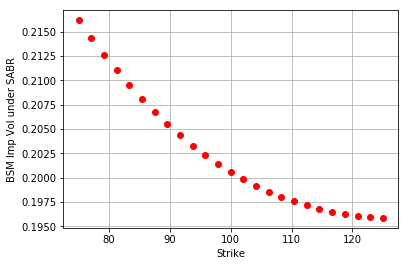

In [6]:
# volatility smile plot: try with different parameters
plt.plot(strike, bsm_vol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('BSM Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

In [7]:
# implied vol (sigma in this case)
# you should get back the original sigma
sabr_bsm.impvol(price[11], strike[11], forward)

0.1999999999996923

### (2) SABR for $\beta=0$

In [8]:
strike = np.linspace(75,125,num=25)
#strike = 1
forward = 100
sigma = 20
texp = 1
alpha = 0.5
rho = -0.25
beta = 0

In [9]:
nvol = opt.sabr.norm_vol(strike, forward, texp, sigma, alpha=alpha, rho=rho)

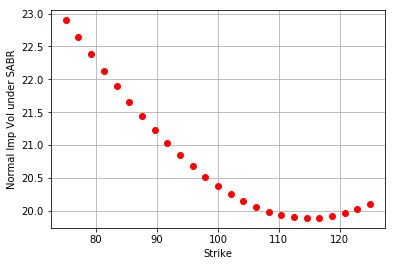

In [10]:
plt.plot(strike, nvol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('Normal Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

In [11]:
sabr_norm = opt.sabr.ModelNormalHagan(texp, sigma, alpha=alpha, rho=rho)
sabr_norm.__dict__

{'alpha': 0.5,
 'beta': 0.0,
 'divr': 0,
 'intr': 0,
 'normal_model': <option_models.normal.Model at 0x8de5748>,
 'rho': -0.25,
 'sigma': 20,
 'texp': 1}

In [12]:
price = sabr_norm.price(strike, forward)
norm_vol = sabr_norm.norm_vol(strike, forward)
price, norm_vol

(array([ 26.59695921,  24.75853528,  22.95673964,  21.19638261,
         19.4826555 ,  17.82107839,  16.21741812,  14.67757267,
         13.20742012,  11.81263312,  10.49846428,   9.26951283,
          8.12948788,   7.08098803,   6.12531972,   5.26237563,
          4.49059068,   3.80698489,   3.20729256,   2.68616625,
          2.23743499,   1.85439056,   1.53007481,   1.2575435 ,   1.03008923]),
 array([ 22.898288  ,  22.63620745,  22.38073263,  22.1326082 ,
         21.89263645,  21.66167534,  21.44063425,  21.2304669 ,
         21.03216098,  20.84672415,  20.67516621,  20.5184775 ,
         20.37760417,  20.25342105,  20.1467038 ,  20.05810179,
         19.98811408,  19.93707021,  19.9051177 ,  19.89221722,
         19.89814614,  19.92250965,  19.9647587 ,  20.02421277,  20.10008575]))

In [13]:
# implied vol (e.g. sigma)
sabr_norm.impvol(price[11], strike[11], forward)

19.999999999999922

### (3) Smile calibration to 3 options

In [14]:
strike3 = np.array([90, 100, 110])
price3 = price = sabr_norm.price(strike3, forward)
norm_vol3 = sabr_norm.norm_vol(strike3, forward)

price3, norm_vol3

(array([ 14.37778096,   8.12948788,   3.9368394 ]),
 array([ 21.18982474,  20.37760417,  19.94575372]))

In [15]:
# makre sure this return the original sigma, alpha, rho
sabr_norm.calibrate3(norm_vol3, strike3, forward, is_vol=True)

(0, 0, 0)

In [ ]:
# makre sure this return the original sigma, alpha, rho
sabr_norm.calibrate3(price3, strike3, forward, is_vol=False)

Below is same for sabr_bsm

In [17]:
strike3 = np.array([90, 100, 110])
price3 = price = sabr_bsm.price(strike3, forward)
bsm_vol3 = sabr_bsm.bsm_vol(strike3, forward)

price3, bsm_vol3

(array([ 13.76304936,   7.98975638,   4.20550187]),
 array([ 0.20528823,  0.20060937,  0.19766924]))

In [18]:
# makre sure this return the original sigma, alpha, rho
sabr_norm.calibrate3(bsm_vol3, strike3, forward, is_vol=True)

(0, 0, 0)

In [19]:
# makre sure this return the original sigma, alpha, rho
sabr_norm.calibrate3(price3, strike3, forward, is_vol=False)

(0, 0, 0)

## 2. Pricing under MC method

More code to be provided soon

## 3. Pricing under conditional MC method

More code to be provided soon